In [1]:
# generate data random untuk praktek

import pandas as pd
import numpy as np

np.random.seed(42)
n = 100

data = {
    "age": np.random.randint(40, 90, size=n),
    "anaemia": np.random.randint(0, 2, size=n),
    "high_blood_pressure": np.random.randint(0, 2, size=n),
    "creatinine_phosphokinase": np.random.randint(20, 800, size=n),
    "diabetes": np.random.randint(0, 2, size=n),
    "ejection_fraction": np.random.randint(20, 70, size=n),
    "platelets": np.random.randint(100000, 400000, size=n),
    "serum_creatinine": np.round(np.random.uniform(0.5, 5.0, size=n), 2),
    "serum_sodium": np.random.randint(120, 150, size=n),
    "sex": np.random.randint(0, 2, size=n),
    "smoking": np.random.randint(0, 2, size=n),
    "time": np.random.randint(1, 300, size=n),
    "DEATH_EVENT": np.random.randint(0, 2, size=n)
}

df = pd.DataFrame(data)
df.to_csv('heart_failure_synthetic.csv', index=False)
df.head()


,age,anaemia,high_blood_pressure,creatinine_phosphokinase,diabetes,ejection_fraction,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,78,0,1,783,1,41,290347,3.12,123,1,0,1,1
1,68,1,1,422,1,68,111938,4.38,149,0,0,90,0
2,54,0,0,365,0,61,104000,4.46,120,0,0,142,0
3,82,1,1,530,1,25,301660,1.57,136,0,1,38,0
4,47,1,0,166,0,34,351492,4.58,127,1,0,293,1


In [2]:
from google.colab import files
files.download("heart_failure_synthetic.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# langkah diatas ini optional. mahasiswa juga bisa menungduh dari repositori yang dicantumkan pada tuton jika ingin menyimpan csv nya.

In [3]:
# 1. Import library
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# 2. Load dataset
df = pd.read_csv('heart_failure_synthetic.csv')
df.head()

,age,anaemia,high_blood_pressure,creatinine_phosphokinase,diabetes,ejection_fraction,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,78,0,1,783,1,41,290347,3.12,123,1,0,1,1
1,68,1,1,422,1,68,111938,4.38,149,0,0,90,0
2,54,0,0,365,0,61,104000,4.46,120,0,0,142,0
3,82,1,1,530,1,25,301660,1.57,136,0,1,38,0
4,47,1,0,166,0,34,351492,4.58,127,1,0,293,1


In [4]:
# 3. Eksplorasi data singkat
print(df.info())
print(df.describe())
print(df['DEATH_EVENT'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       100 non-null    int64  
 1   anaemia                   100 non-null    int64  
 2   high_blood_pressure       100 non-null    int64  
 3   creatinine_phosphokinase  100 non-null    int64  
 4   diabetes                  100 non-null    int64  
 5   ejection_fraction         100 non-null    int64  
 6   platelets                 100 non-null    int64  
 7   serum_creatinine          100 non-null    float64
 8   serum_sodium              100 non-null    int64  
 9   sex                       100 non-null    int64  
 10  smoking                   100 non-null    int64  
 11  time                      100 non-null    int64  
 12  DEATH_EVENT               100 non-null    int64  
dtypes: float64(1), int64(12)
memory usage: 10.3 KB
None
              

In [5]:
# 4. Cek missing value
print(df.isnull().sum())

age                         0
anaemia                     0
high_blood_pressure         0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64


In [6]:
# 5. Pisahkan fitur dan target
X = df.drop('DEATH_EVENT', axis=1)
y = df['DEATH_EVENT']


In [8]:
X.head()

,age,anaemia,high_blood_pressure,creatinine_phosphokinase,diabetes,ejection_fraction,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,78,0,1,783,1,41,290347,3.12,123,1,0,1
1,68,1,1,422,1,68,111938,4.38,149,0,0,90
2,54,0,0,365,0,61,104000,4.46,120,0,0,142
3,82,1,1,530,1,25,301660,1.57,136,0,1,38
4,47,1,0,166,0,34,351492,4.58,127,1,0,293


In [9]:
y

,DEATH_EVENT
0,1
1,0
2,0
3,0
4,1
...,...
95,0
96,1
97,0
98,0


In [10]:
# 6. Split data (hold-out)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
 # 7. Buat model Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [12]:
# 8. Evaluasi awal
y_pred = model.predict(X_test)
print("Akurasi:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Akurasi: 0.3
[[ 4  3]
 [11  2]]
              precision    recall  f1-score   support

           0       0.27      0.57      0.36         7
           1       0.40      0.15      0.22        13

    accuracy                           0.30        20
   macro avg       0.33      0.36      0.29        20
weighted avg       0.35      0.30      0.27        20



In [13]:
# 9. Cross-validation (K-Fold)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X, y, cv=kf)
print("Akurasi Cross-Validation:", cv_scores)
print("Rata-rata:", cv_scores.mean())

Akurasi Cross-Validation: [0.25 0.55 0.5  0.4  0.5 ]
Rata-rata: 0.44000000000000006


In [14]:
# 10. Cek kemungkinan overfitting/underfitting
train_acc = model.score(X_train, y_train)
test_acc = model.score(X_test, y_test)
print("Akurasi Training:", train_acc)
print("Akurasi Testing:", test_acc)


Akurasi Training: 1.0
Akurasi Testing: 0.3


In [16]:
if train_acc > test_acc + 0.1:
    print("Model kemungkinan overfitting")
elif test_acc > train_acc + 0.1:
    print("Model kemungkinan underfitting")
else:
    print("Model dalam batas wajar")

Model kemungkinan overfitting


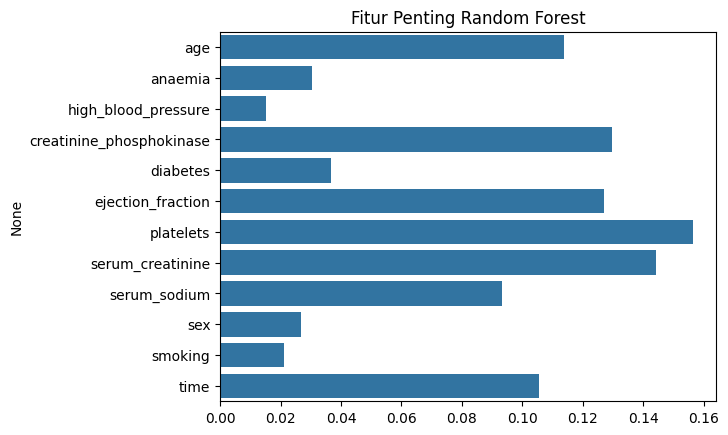

In [17]:
# 11. Visualisasi fitur penting
importances = model.feature_importances_
feat_names = X.columns
sns.barplot(x=importances, y=feat_names)
plt.title("Fitur Penting Random Forest")
plt.show()